## SDXL Fine Tuning

This is tested on SageMaker notebook instance using `conda_pytorch_p310` kernel
### Setup

In [1]:
%%sh

export PIP_ROOT_USER_ACTION=ignore

pip install -Uq pip
pip install autotrain-advanced==0.6.58
pip install diffusers==0.21.4
pip install autocrop

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 264.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 452.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 345.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 398.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.6/158.6 kB 413.5 MB/s eta 0:00:00


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 308.2 MB/s eta 0:00:00


INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 417.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 435.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 397.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 202.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 418.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 298.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 356.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 364.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 150.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 165.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 280.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 301.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.4/520.4 kB 475.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 322.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 252.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 352.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 437.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.9/996.9 kB 450.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 381.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 372.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 413.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 321.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 368.6 MB/s eta 0:00:00
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=13556704 sha256=beb61cecb7e7ba12bc1d2d1ffa91b0d8a010c2d5ff79b3efa847cabb75b225c5
  Stored in directory: /tmp/pip-ephem-wheel-cache-qy885xn4/wheels/5b/ea/e3/2f6e0860a327daba3b030853fce4483ed37468bbf1101c59c3
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=9d33a8927f61c4f782b629c99f758f14ed6aed78bde7ebfcd6392cbd5df26ea9
  Stored in directory: /tmp/pip-ephem-wheel-cache-qy885xn4/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895239 sha256=5b388b46789ef6271bc4feece80db01b7340a0c0c982a16a5b706135d8bd1f18
  Stored in directory: /tmp/pip-ephem-wheel-cache-qy885xn4/wheels/00/24/97/a2ea5324f36bc626e1ea0267f33db6aa80d157ee977e9e42fb
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 3.0.1 requires Werkzeug>=3.0.0, but you have werkzeug 2.3.6 which is incompatible.
pathos 0.3.2 requires dill>=0.3.8, but you have dill 0.3.7 which is incompatible.
pathos 0.3.2 requires multiprocess>=0.70.16, but you have multiprocess 0.70.15 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.0/159.0 kB 53.6 MB/s eta 0:00:00


### > Check version

In [2]:
import torch

print(torch.__version__) # e.g., 2.0.0 at time of post

print(torch.cuda.get_device_name(0)) # e.g., NVIDIA A10G

device_count = torch.cuda.device_count()
assert device_count > 0, "No GPU devices detected."

print("Number of available GPU devices:", device_count)

device = torch.device("cuda")

2.1.0
NVIDIA A10G
Number of available GPU devices: 1


### > Prepare the images. The picture needs to be 1024 x 1024

In [4]:
from tqdm.notebook import tqdm
import os
from pathlib import Path
from itertools import chain
import utils
import shutil

imag_dir=Path("data") #source directory to place your image
dest_dir = Path("cropped") # destination directory after image processing
if dest_dir.exists():
    shutil.rmtree(dest_dir)
dest_dir.mkdir(parents=True, exist_ok=True)

for n,img_path in enumerate(chain(imag_dir.glob("*.[jJ][pP]*[Gg]"),imag_dir.glob("*.[Pp][Nn][Gg]"))):
    try:
        cropped = utils.resize_and_center_crop(img_path.as_posix(), 1024)
        cropped.save(dest_dir / f"image_{n}.png")
    except ValueError:
        print(f"Could not detect face in {img_path}. Skipping.")
        continue

print("Here are the preprocessed images ==========")
[x.as_posix() for x in dest_dir.iterdir() if x.is_file()]

Here are the preprocessed images ==========


['cropped/image_7.png',
 'cropped/image_10.png',
 'cropped/image_9.png',
 'cropped/image_6.png',
 'cropped/image_1.png',
 'cropped/image_2.png',
 'cropped/image_4.png',
 'cropped/image_0.png',
 'cropped/image_3.png',
 'cropped/image_8.png',
 'cropped/image_5.png']

- 8bit adam gobbles the images
- prior-preservation exceeds A10G GPU memory
- xformers gives package error

### > Initialize fine tuning parameters

In [5]:
!rm -rf `find -type d -name .ipynb_checkpoints`

In [6]:
# project configuration
project_name = "finetune_jingswu"
%store project_name

model_name_base = "stabilityai/stable-diffusion-xl-base-1.0"
model_name_refiner = "stabilityai/stable-diffusion-xl-refiner-1.0"
model_name_upscaler_4x = "stabilityai/stable-diffusion-x4-upscaler"
model_name_latent_upscaler = "stabilityai/sd-x2-latent-upscaler"

# fine-tuning prompts
# 'oue' is the rare tokens, 'car' is the class
instance_prompt = "photo of <<TOK>>"
class_prompt = "photo of a person"

# fine-tuning hyperparameters
learning_rate = 1e-4
num_steps = 1000
batch_size = 1
gradient_accumulation = 4
resolution = 1024
num_class_image = 50

class_image_path=Path(f"/tmp/priors")

# environment variables for autotrain command
os.environ["PROJECT_NAME"] = project_name
os.environ["MODEL_NAME"] = model_name_base
os.environ["INSTANCE_PROMPT"] = instance_prompt
os.environ["CLASS_PROMPT"] = class_prompt
os.environ["IMAGE_PATH"] = dest_dir.as_posix()
os.environ["LEARNING_RATE"] = str(learning_rate)
os.environ["NUM_STEPS"] = str(num_steps)
os.environ["BATCH_SIZE"] = str(batch_size)
os.environ["GRADIENT_ACCUMULATION"] = str(gradient_accumulation)
os.environ["RESOLUTION"] = str(resolution)
os.environ["CLASS_IMAGE_PATH"] = class_image_path.as_posix()
os.environ["NUM_CLASS_IMAGE"] = str(num_class_image)

Stored 'project_name' (str)


### > use autotrain to fine tune

help command will show all the available parameters

```
!autotrain dreambooth --help
```

In [7]:
!autotrain dreambooth \
    --model ${MODEL_NAME} \
    --project-name ${PROJECT_NAME} \
    --image-path "${IMAGE_PATH}" \
    --prompt "${INSTANCE_PROMPT}" \
    --class-prompt "${CLASS_PROMPT}" \
    --resolution ${RESOLUTION} \
    --batch-size ${BATCH_SIZE} \
    --num-steps ${NUM_STEPS} \
    --gradient-accumulation ${GRADIENT_ACCUMULATION} \
    --lr ${LEARNING_RATE} \
    --fp16 \
    --gradient-checkpointing

> INFO    Namespace(version=False, model='stabilityai/stable-diffusion-xl-base-1.0', revision=None, tokenizer=None, image_path='cropped', class_image_path=None, prompt='photo of <<TOK>>', class_prompt='photo of a person', num_class_images=100, class_labels_conditioning=None, prior_preservation=None, prior_loss_weight=1.0, project_name='finetune_jingswu', seed=42, resolution=1024, center_crop=None, train_text_encoder=None, batch_size=1, sample_batch_size=4, epochs=1, num_steps=1000, checkpointing_steps=100000, resume_from_checkpoint=None, gradient_accumulation=4, gradient_checkpointing=True, lr=0.0001, scale_lr=None, scheduler='constant', warmup_steps=0, num_cycles=1, lr_power=1.0, dataloader_num_workers=0, use_8bit_adam=None, adam_beta1=0.9, adam_beta2=0.999, adam_weight_decay=0.01, adam_epsilon=1e-08, max_grad_norm=1.0, allow_tf32=None, prior_generation_precision=None, local_rank=-1, xformers=None, pre_compute_text_embeddings=None, tokenizer_max_length=None, text_encoder_use_attention

### > Load the fine tune model

In [8]:
from diffusers import DiffusionPipeline, StableDiffusionXLImg2ImgPipeline

pipeline = DiffusionPipeline.from_pretrained(
    model_name_base,
    torch_dtype=torch.float16,
).to(device)

pipeline.load_lora_weights(
    project_name, 
    weight_name="pytorch_lora_weights.safetensors",
    adapter_name="jingswu"
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [9]:
prompt = """photo of <<TOK>>, with glasses, cute modern disney style, Pixar 3d portrait, ultra detailed, gorgeous, 3d zbrush, trending on dribbble, 8k render"""

negative_prompt = """ugly, tiling, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, extra limbs, disfigured, deformed, body out of frame, blurry, bad anatomy, blurred, 
watermark, grainy, signature, cut off, draft, amateur, multiple, gross, weird, uneven, furnishing, decorating, decoration, furniture, text, poor, low, basic, worst, juvenile, 
unprofessional, failure, crayon, oil, label, thousand hands"""

  0%|          | 0/50 [00:00<?, ?it/s]

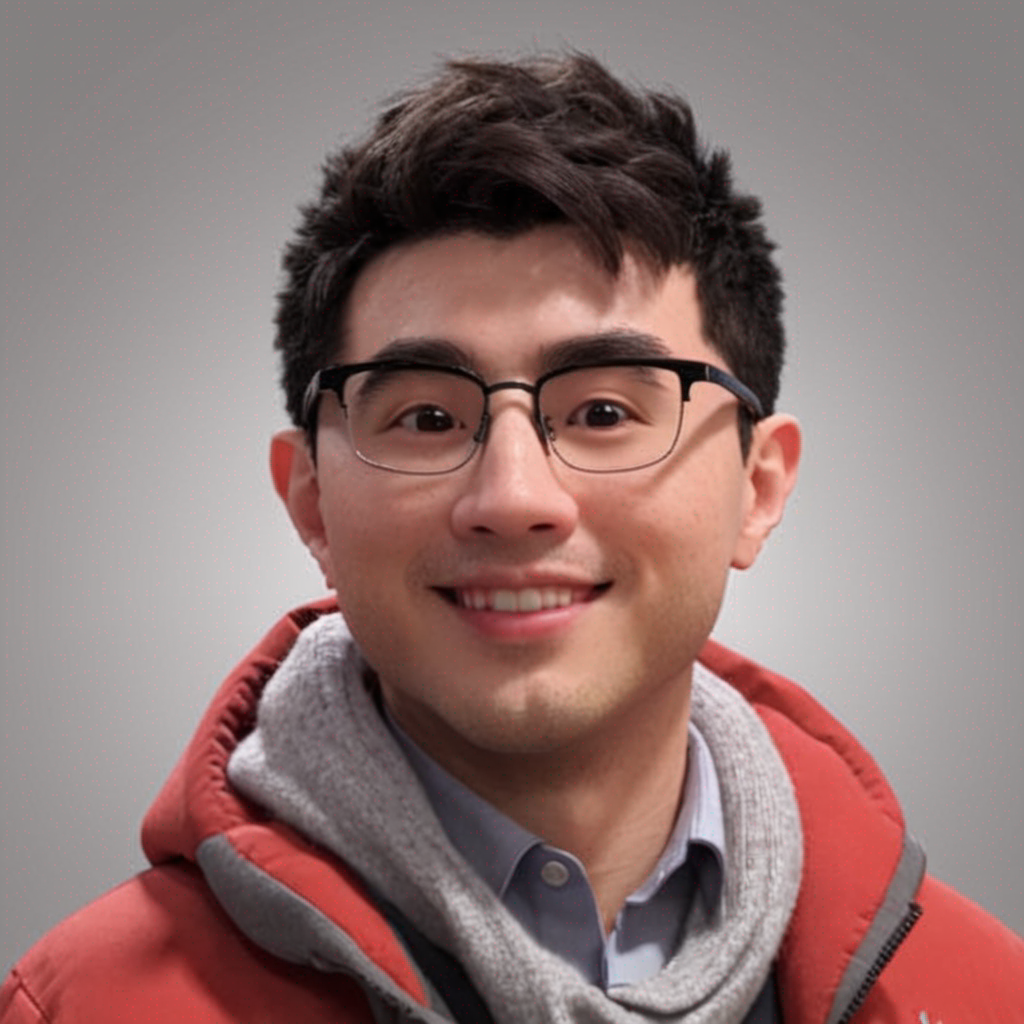

In [10]:
import random

seed = random.randint(0, 100000)
generator = torch.Generator(device).manual_seed(seed)
base_image = pipeline(
    prompt=prompt, 
    negative_prompt=negative_prompt,
    num_inference_steps=50,
    generator=generator,
    height=1024,
    width=1024,
    output_type="pil",
).images[0]
base_image